In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("train\LatencyTraining.csv")

<AxesSubplot:>

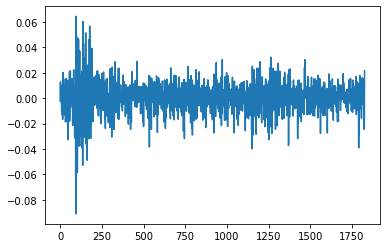

In [31]:
df.LogReturns.plot()

In [50]:
# Creating training data sets
from csv import reader, writer
import os

decisionArray = []
lenTrainSet = len(df.LogReturns)
inputSet = 500
for i in range(0,lenTrainSet-inputSet,50):
    df500 = df.LogReturns[i:i+inputSet]
    df500 = df500.iloc[::-1]
    decision = int(df.LogReturns[i+inputSet] > df.LogReturns[i+inputSet-1])
    decisionArray.append(decision)
    df500.to_csv(f"train/train_{i}_{decision}_temp.csv",index=False,header=False,sep=',')
    # Transpose into proper format
    with open(f'train/train_{i}_{decision}_temp.csv') as f, open(f'train/train_{i}_{decision}.csv', 'w') as fw: 
        writer(fw, delimiter=',').writerows(zip(*reader(f, delimiter=',')))
    os.remove(f"train/train_{i}_{decision}_temp.csv")

In [101]:
# Test algorithm
import os
import time
import csv
import subprocess

print(f"DecisionCSV | Real")
for i,val in enumerate(range(0,1300,50)):
    os.system("ls")
    # os.system(f"cat train/train_{val}_{decisionArray[i]}.csv | make run > predictions.csv")
    subprocess.run([f'cat train/train_{val}_{decisionArray[i]}.csv | make run > predictions.csv'],shell=True)
    time.sleep(0.2)
    
    with open("predictions.csv", "r") as infile:
        reader = csv.reader(infile)
        first_row = next(reader, None)  # skip the headers
        decisionCSV = next(reader)[0]
        momentumSumCSV = next(reader)[0]
        momentumCSV = next(reader)[0]

    print(f"{decisionCSV} | {decisionArray[i]} | {momentumSumCSV} | {momentumCSV}")
    

DecisionCSV | Real
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 0 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 1 | 5 | 101101010
0 | 0 | 5 | 101101010


In [100]:
%%bash
cat train/train_50_0.csv | make run > predictions.csv